In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyvista as pv

In [3]:
file = "/home/jdiego/Documents/Computacional_1/TURB_DRIVE_SUP/TURB_DRIVE_SUP/units.out"

In [6]:
#read unit file: 

data_u = pd.read_csv(file) 

In [7]:
print(data_u)

  variable  normalisation   units
0    rho_0   1.660000e-24  g/cm^3
1      v_0   1.000000e+06    cm/s
2      L_0   3.086000e+18      cm
3    c_iso   1.000000e+06    cm/s


In [14]:
#Plaece the values into objects: 

rho_0 = np.array(data_u.loc[data_u["variable"]== 'rho_0']["normalisation"])
v_0 = np.array(data_u.loc[data_u["variable"]== 'v_0']["normalisation"])
L_0 = np.array(data_u.loc[data_u["variable"]== 'L_0']["normalisation"])
c_iso = np.array(data_u.loc[data_u["variable"]== 'c_iso']["normalisation"])

In [17]:
#getting correct units: 

t0 = L_0/v_0

p0 = rho_0*v_0**2

b0 = v_0*np.sqrt(4*np.pi*rho_0)

print(t0,p0,b0)

[3.086e+12] [1.66e-12] [4.56729408e-06]


In [18]:
# use pandas to retrive times: 
file1 = "/home/jdiego/Documents/Computacional_1/TURB_DRIVE_SUP/TURB_DRIVE_SUP/vtk.out"

data_vt = pd.read_csv(file1, sep="\s+",header= None) 

In [19]:
print(data_vt)

      0         1         2    3            4       5    6    7    8    9   \
0      0  0.000000  0.000100    0  single_file  little  rho  vx1  vx2  Bx1   
1      1  0.018194  0.001919   31  single_file  little  rho  vx1  vx2  Bx1   
2      2  0.036404  0.003740   38  single_file  little  rho  vx1  vx2  Bx1   
3      3  0.059240  0.006024   43  single_file  little  rho  vx1  vx2  Bx1   
4      4  0.079180  0.008018   46  single_file  little  rho  vx1  vx2  Bx1   
..   ...       ...       ...  ...          ...     ...  ...  ...  ...  ...   
96    96  1.918657  0.001664  809  single_file  little  rho  vx1  vx2  Bx1   
97    97  1.938610  0.001678  821  single_file  little  rho  vx1  vx2  Bx1   
98    98  1.958715  0.001762  833  single_file  little  rho  vx1  vx2  Bx1   
99    99  1.979934  0.001973  844  single_file  little  rho  vx1  vx2  Bx1   
100  100  2.000000  0.000444  855  single_file  little  rho  vx1  vx2  Bx1   

      10  
0    Bx2  
1    Bx2  
2    Bx2  
3    Bx2  
4    Bx2

In [25]:
#get second columns: 

time = np.array(data_vt.iloc[:,1])

print(time)

[0.         0.01819434 0.03640434 0.05924007 0.07917953 0.09597401
 0.1124295  0.1346697  0.1551814  0.1792735  0.1958306  0.215993
 0.2390437  0.2563744  0.2799268  0.2981409  0.3187561  0.3395505
 0.3568274  0.3790399  0.3971267  0.4187818  0.4376098  0.4592064
 0.477559   0.4984522  0.5187867  0.537784   0.5590443  0.5778229
 0.5987185  0.6181704  0.6382675  0.6596456  0.6792722  0.6998511
 0.7182088  0.7387392  0.7594654  0.7785347  0.7984149  0.8183453
 0.839887   0.8590377  0.8783408  0.8982412  0.9184231  0.9382164
 0.9584865  0.9774884  0.9976289  1.019102   1.037868   1.058801
 1.078758   1.098413   1.119254   1.139214   1.159028   1.179105
 1.197959   1.219521   1.239696   1.259164   1.278536   1.298279
 1.319547   1.339866   1.35785    1.379021   1.398392   1.419636
 1.439755   1.459069   1.478401   1.499313   1.519265   1.538811
 1.559203   1.578353   1.599194   1.619713   1.639863   1.659742
 1.679053   1.69978    1.71914    1.738601   1.75844    1.778482
 1.798953   1.818

In [26]:
tcgs = time*t0

print(tcgs)

[0.00000000e+00 5.61477332e+10 1.12343793e+11 1.82814856e+11
 2.44348030e+11 2.96175795e+11 3.46957437e+11 4.15590694e+11
 4.78889800e+11 5.53238021e+11 6.04333232e+11 6.66554398e+11
 7.37688858e+11 7.91171398e+11 8.63854105e+11 9.20062817e+11
 9.83681325e+11 1.04785284e+12 1.10116936e+12 1.16971713e+12
 1.22553300e+12 1.29236063e+12 1.35046384e+12 1.41711095e+12
 1.47374707e+12 1.53822349e+12 1.60097576e+12 1.65960142e+12
 1.72521071e+12 1.78316147e+12 1.84764529e+12 1.90767385e+12
 1.96969350e+12 2.03566632e+12 2.09623401e+12 2.15974049e+12
 2.21639236e+12 2.27974917e+12 2.34371022e+12 2.40255808e+12
 2.46390838e+12 2.52541360e+12 2.59189128e+12 2.65099034e+12
 2.71055971e+12 2.77197234e+12 2.83425369e+12 2.89533581e+12
 2.95788934e+12 3.01652920e+12 3.07868279e+12 3.14494877e+12
 3.20286065e+12 3.26745989e+12 3.32904719e+12 3.38970252e+12
 3.45401784e+12 3.51561440e+12 3.57676041e+12 3.63871803e+12
 3.69690147e+12 3.76344181e+12 3.82570186e+12 3.88578010e+12
 3.94556210e+12 4.006488

In [27]:
#Getting data into a mesh: 

mesh = pv.read("/home/jdiego/Documents/Computacional_1/TURB_DRIVE_SUP/TURB_DRIVE_SUP/data.0062.vtk")

print(mesh)

RectilinearGrid (0x7f615b732080)
  N Cells:      2500
  N Points:     2601
  X Bounds:     -2.000e+00, 2.000e+00
  Y Bounds:     -2.000e+00, 2.000e+00
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   51, 51, 1
  N Arrays:     5


In [32]:
rho = pv.get_array(mesh,"rho",preference = 'cell')
vx1 = pv.get_array(mesh,"vx1",preference = 'cell')
vx2 = pv.get_array(mesh,"vx2",preference = 'cell')
bx1 = pv.get_array(mesh,"bx1",preference = 'cell')
bx2 = pv.get_array(mesh,"bx2",preference = 'cell')

In [34]:
rhocgs = rho*rho_0
vx1cgs = vx1*v_0
vx2cgs = vx2*v_0
bx1cgs = vx1*b0
bx2cgs = vx2*b0

In [37]:
rhocgs_2D = rhocgs.reshape(mesh.dimensions[0]-1,mesh.dimensions[1]-1)
vx1cgs_2D = vx1cgs.reshape(mesh.dimensions[0]-1,mesh.dimensions[1]-1)
vx2cgs_2D = vx2cgs.reshape(mesh.dimensions[0]-1,mesh.dimensions[1]-1)
bx1cgs_2D = bx2cgs.reshape(mesh.dimensions[0]-1,mesh.dimensions[1]-1)
bx2cgs_2D = bx2cgs.reshape(mesh.dimensions[0]-1,mesh.dimensions[1]-1)

In [41]:
x = np.linspace(mesh.bounds[0],mesh.bounds[1],mesh.dimensions[1]-1)*t0
y = np.linspace(mesh.bounds[2],mesh.bounds[1],mesh.dimensions[0]-1)*t0
x_2d,y_2d = np.meshgrid(x,y)

In [43]:
modulus_velocity = np.sqrt(vx1cgs_2D**2 + vx2cgs_2D**2)

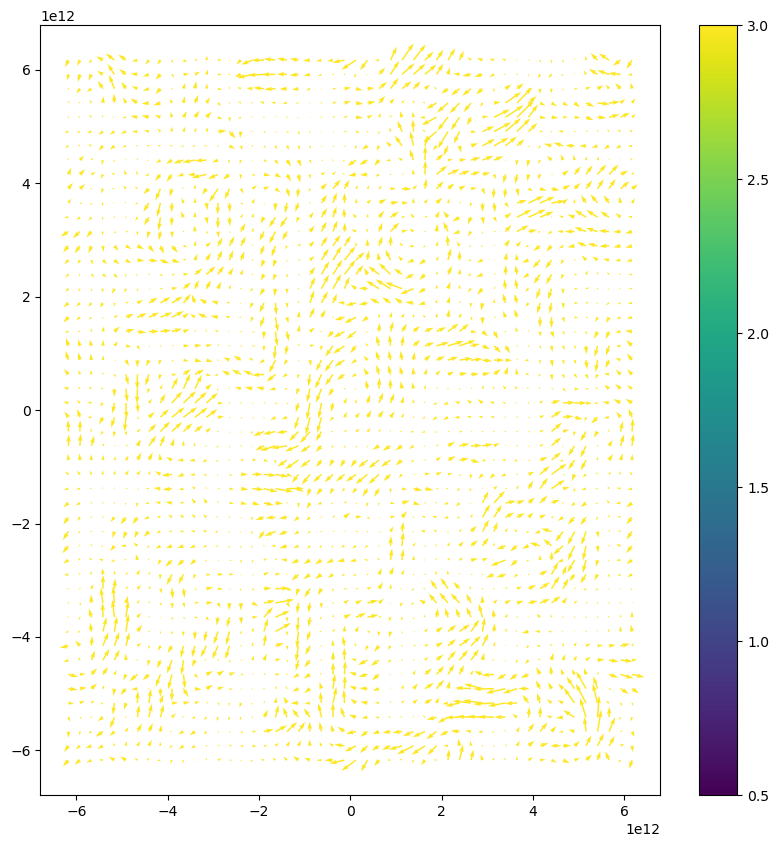

In [47]:
plt.figure(figsize=(10,10))

Z = plt.quiver(x_2d, y_2d, vx1cgs_2D, vx2cgs_2D, modulus_velocity, clim=(0.5, 3))

plt.colorbar(Z)

plt.show()

In [51]:
pcgs = rhocgs_2D*c_iso**2

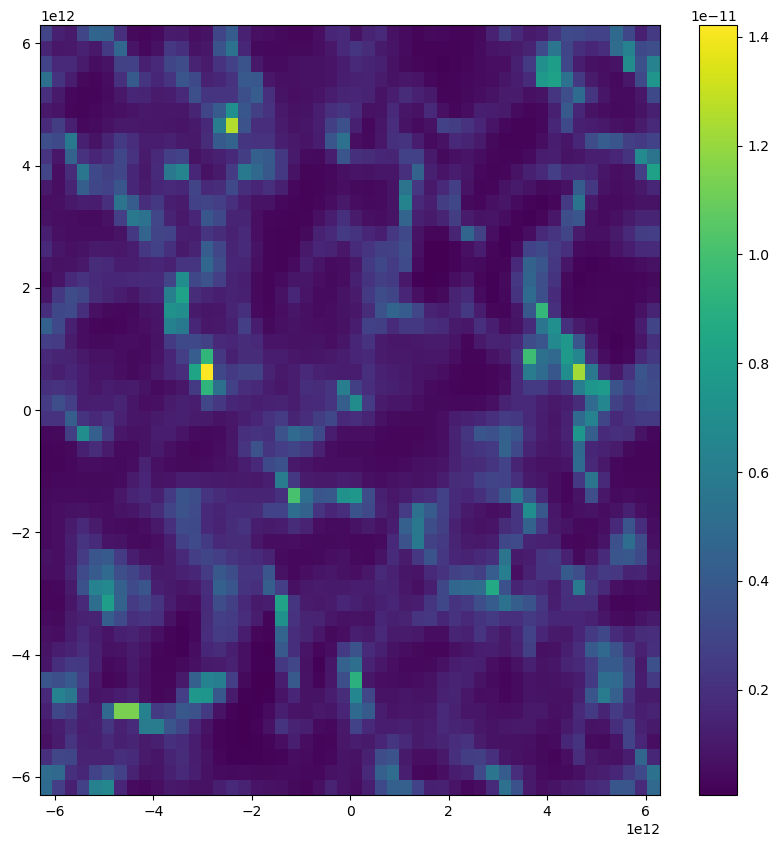

In [55]:
plt.figure(figsize=(10,10))

Z = plt.pcolor(x_2d, y_2d, pcgs,cmap = 'viridis')

plt.colorbar(Z)

plt.show()

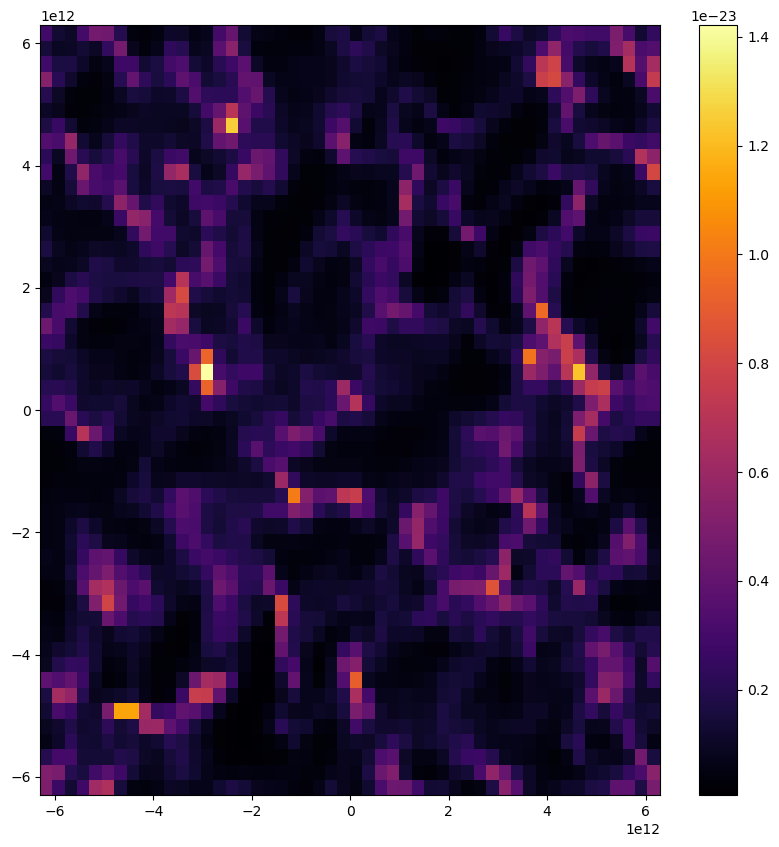

In [57]:
plt.figure(figsize=(10,10))

Z = plt.pcolor(x_2d, y_2d, rhocgs_2D,cmap = 'inferno')

plt.colorbar(Z)

plt.show()

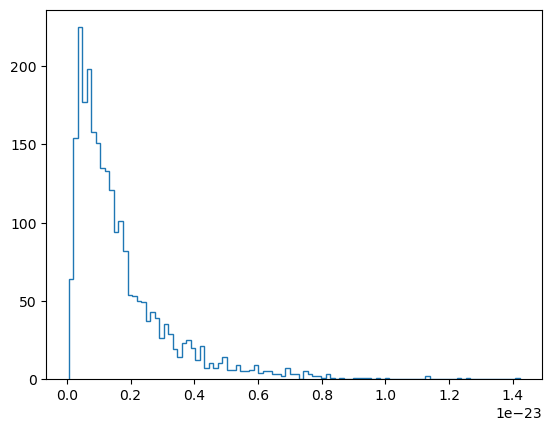

In [67]:
plt.figure()

plt.hist(rhocgs,100, histtype = 'step')
plt.show()